In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt
import matplotlib.dates as mdates
import numpy as np

In [5]:
path = r'C:\Users\LENOVO\OneDrive\WaterSprint\Projects\Badin-WASH Project\Climate Risk Assessment\validation'
path = path.replace("\\", "/")
path

'C:/Users/LENOVO/OneDrive/WaterSprint/Projects/Badin-WASH Project/Climate Risk Assessment/validation'

In [48]:
#Reading the corrected PMD files using pandas
PPT = pd.read_excel(path+'/Badin_Rainfall.xlsx')
PPT['date'] = pd.to_datetime(PPT['date'])

#Average Monthly Data
Avg_M = pd.read_excel(path+'/badin_monthly.xlsx')

In [49]:
PPT

,Sr. #,Month,day,year,date,STATION,Precipitation(mm)_PMD,Precipitation(mm)_ERA5,Precipitation(mm)_Climate,Precipitation(mm)_Point
0,1,1,1,1988,1988-01-01,BADIN,0.0,0.000000,0.0000,0.0000
1,2,1,2,1988,1988-01-02,BADIN,0.0,0.115465,0.0878,0.1377
2,3,1,3,1988,1988-01-03,BADIN,0.0,0.000000,0.0000,0.0000
3,4,1,4,1988,1988-01-04,BADIN,0.0,0.022982,0.0144,0.0075
4,5,1,5,1988,1988-01-05,BADIN,0.0,0.000000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...
10953,11156,12,27,2017,2017-12-27,BADIN,0.0,0.000045,0.0000,0.0000
10954,11157,12,28,2017,2017-12-28,BADIN,0.0,0.000045,0.0000,0.0000
10955,11158,12,29,2017,2017-12-29,BADIN,0.0,0.000045,0.0000,0.0000
10956,11159,12,30,2017,2017-12-30,BADIN,0.0,0.000045,0.0000,0.0000


In [50]:
start_date = '2002-01-01'
end_date = '2017-12-31'
df1 = PPT[(PPT['date'] >= start_date) & (PPT['date'] <= end_date)]

In [52]:
df1['year'] = df1['date'].dt.year
yearly_sum_PPT = df1.groupby('year')[['Precipitation(mm)_PMD','Precipitation(mm)_ERA5','Precipitation(mm)_Climate','Precipitation(mm)_Point']].sum().reset_index()
yearly_sum_PPT

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_488\498232065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = df1['date'].dt.year


,year,Precipitation(mm)_PMD,Precipitation(mm)_ERA5,Precipitation(mm)_Climate,Precipitation(mm)_Point
0,2002,36.6,28.519473,24.1444,28.0444
1,2003,391.6,406.016787,382.4245,398.2438
2,2004,146.0,91.183992,85.3589,81.1005
3,2005,56.9,73.058012,66.2194,63.0410
4,2006,392.4,446.114932,459.0908,497.6411
5,2007,227.6,256.510386,257.0455,268.7686
6,2008,168.8,146.798407,147.8818,168.9474
7,2009,235.1,340.419192,334.0618,375.7715
8,2010,348.3,354.042959,342.8980,355.6054
9,2011,662.5,573.815642,567.0264,593.4081


([<matplotlib.axis.YTick at 0x1999bbad9c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

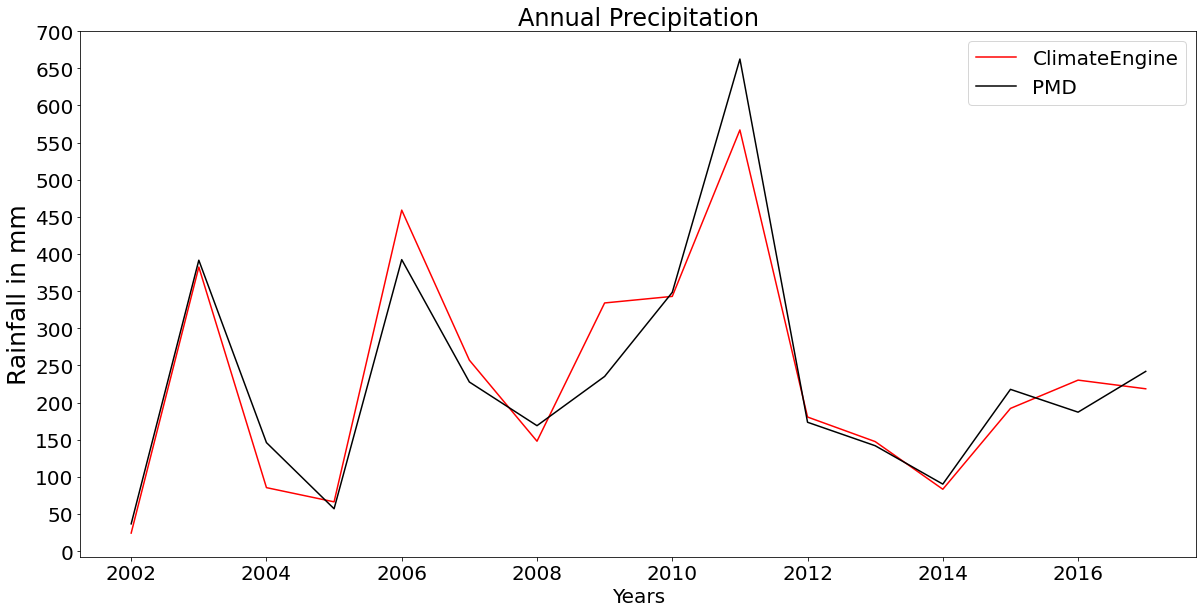

In [54]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(bottom=0.15)
# plt.xticks(rotation=90)
plt.xticks(fontsize=20)

plt.plot('year', 'Precipitation(mm)_Climate', data=yearly_sum_PPT, label='ClimateEngine', color ='#FF0000')
# plt.plot('year', 'Precipitation(mm)_Point', data=yearly_sum_PPT, label='ERA5', color='blue')
plt.plot('year', 'Precipitation(mm)_PMD', data=yearly_sum_PPT, label='PMD', color='black')


#Labelling the plot
plt.legend(loc='upper left')
plt.legend(fontsize='20')
plt.xlabel('Years',fontsize = '20')
plt.ylabel('Rainfall in mm',fontsize = '25')
plt.tick_params(axis='y', labelsize=20)
plt.title('Annual Precipitation', fontsize= '24')
plt.xticks(np.arange(2002, 2017, 2), fontsize=20)
plt.yticks(np.arange(0, 750, 50), fontsize=20)
# plt.savefig('C:/Users/LENOVO/OneDrive/WaterSprint/ADB Project/DataSet Comparison//GraphsYearly_Sum.png')

Text(0.5, 1.0, 'Precipitation Time Series')

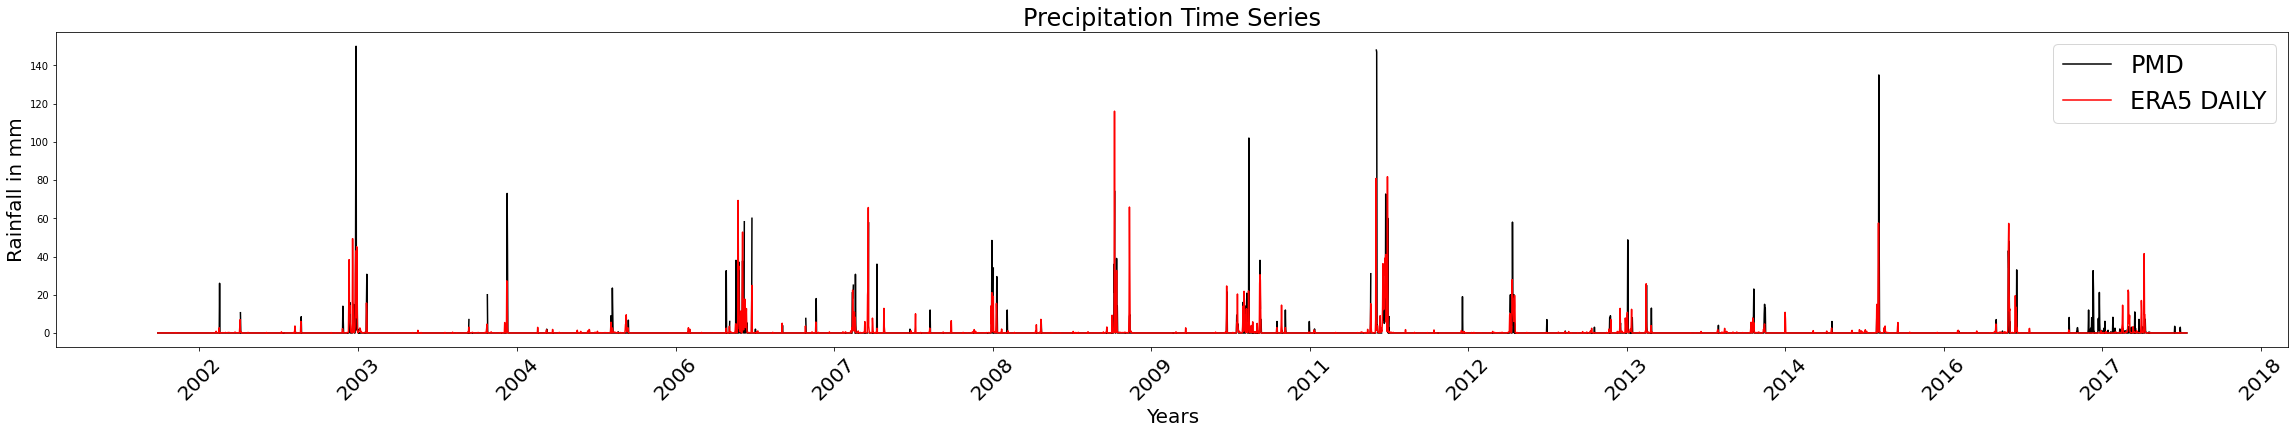

In [40]:
plt.figure(figsize=(40, 6))
plt.subplots_adjust(bottom=0.15)
plt.xticks(rotation=45)
plt.xticks(fontsize=20)
# Set the x-tick locations and labels
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=15)) # Show tick every month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Set format of the tick
# Create a plot with multiple lines
plt.plot('date', 'Precipitation(mm)_PMD', data=df1, label='PMD', color='black')
plt.plot('date', 'Precipitation(mm)_Climate', data=df1, label='ERA5 DAILY', color='red')

#Labelling the plot
plt.legend(loc='upper left')
plt.legend(fontsize='24')
plt.xlabel('Years',fontsize = '20')
plt.ylabel('Rainfall in mm',fontsize = '20')
plt.title('Precipitation Time Series', fontsize= '24')

In [60]:
Avg_M

,Month,Days in month,Precipitation_PMD,Precipitation_ERA5,Precipitation_CE,Precipitation_Point
0,Jan,31,1.760000,1.773633,1.639576,1.462767
1,Feb,28,6.821698,2.370524,2.317670,2.372406
2,Mar,31,1.760000,1.243563,1.138850,1.158263
3,Apr,30,5.553333,1.634607,1.471356,1.619760
4,May,31,0.416667,8.401637,8.878187,7.583810
5,Jun,30,9.193333,8.820960,9.904588,8.656697
6,Jul,31,73.636667,81.289933,83.971922,84.286043
7,Aug,31,80.336667,68.857127,70.062730,71.791790
8,Sep,30,41.700000,32.302647,33.633309,34.007723
9,Oct,31,8.873333,8.713750,8.803530,9.147777


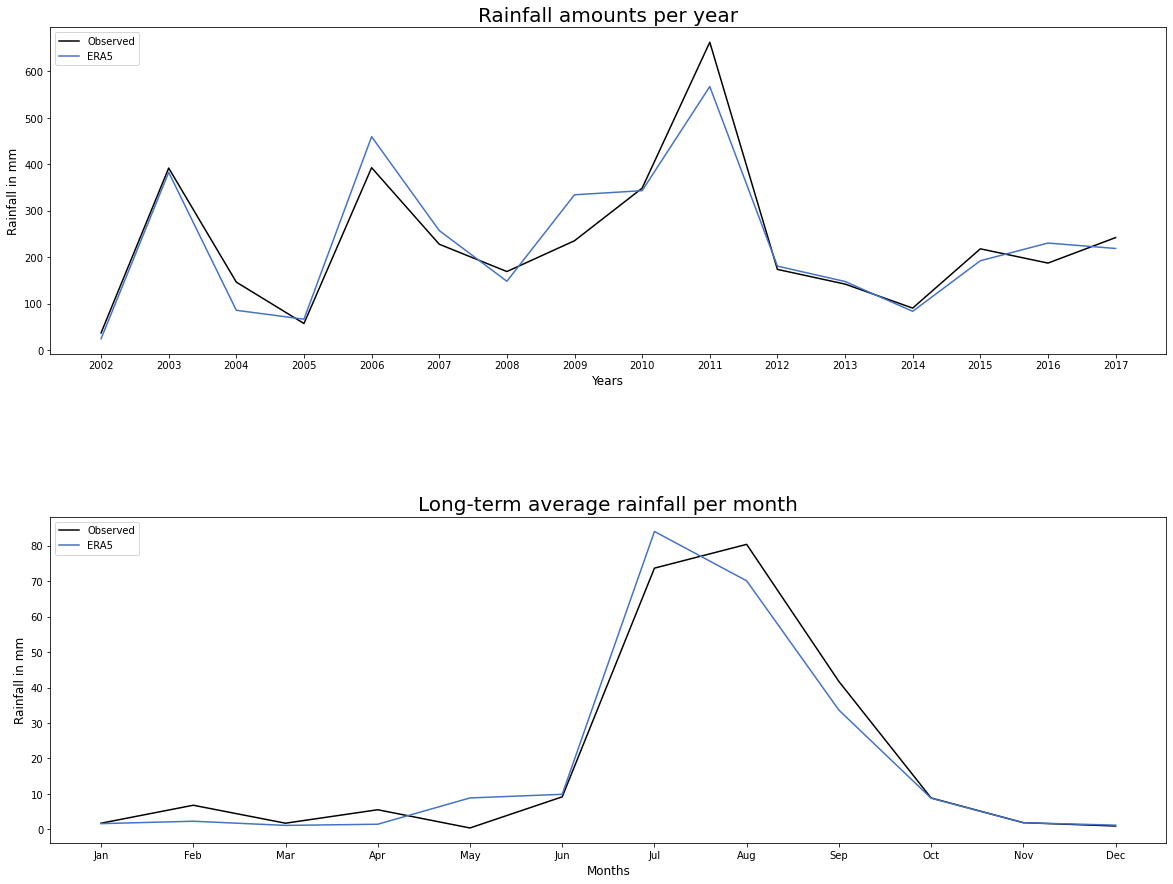

In [73]:
#Plot in subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

fig.subplots_adjust(hspace=0.5)

date_fmt = mdates.DateFormatter('%Y')

# set the x-axis ticker to only show years

# axs[0,0].plot(yearly_sum_PPT['year'], yearly_sum_PPT['CHIRP'],color='#4472C4',label='CHIRPS')
axs[0].plot(yearly_sum_PPT['year'], yearly_sum_PPT['Precipitation(mm)_PMD'],color='black',label='Observed')
axs[0].plot(yearly_sum_PPT['year'], yearly_sum_PPT['Precipitation(mm)_Climate'],color='#4472C4',label='ERA5')
axs[0].set_title('Rainfall amounts per year',fontsize='20')
axs[0].set_ylabel('Rainfall in mm')
axs[0].set_xlabel('Years',fontsize='12')
axs[0].set_xticks(range(2002,2018, 1))
axs[0].set_ylabel('Rainfall in mm',fontsize='12')
axs[0].legend(loc='upper left')



# axs[1,0].plot(Avg_M['Month'], Avg_M['Precipitation (mm/mth) CHIRPS'],color='#4472C4',label='CHIRPS')
axs[1].plot(Avg_M['Month'], Avg_M['Precipitation_PMD'],color='black',label='Observed')
axs[1].plot(Avg_M['Month'], Avg_M['Precipitation_CE'],color='#4472C4',label='ERA5')
axs[1].set_title('Long-term average rainfall per month',fontsize='20')
axs[1].set_ylabel('Rainfall in mm',fontsize='12')
axs[1].set_yticks(range(0,85, 10))
axs[1].set_xlabel('Months',fontsize='12')
axs[1].legend(loc='upper left')